# Regressão Linear - Predição da Idade

### importar bibliotecas

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### ler train.csv e test.csv

In [4]:
train = pd.read_csv('titanic/train.csv')

In [5]:
test = pd.read_csv('titanic/test.csv')

### transformar definir o Id do Passageiro como Index

In [7]:
train.set_index('PassengerId', inplace=True)

In [8]:
test.set_index('PassengerId', inplace=True)

### Verificar shape dos dois

In [9]:
train.shape, test.shape

((891, 11), (418, 10))

### Criar coluna "Survived" no test set

In [10]:
test['Survived'] = np.nan

### Conferir shape novamente

In [11]:
train.shape, test.shape

((891, 11), (418, 11))

### Concatenar train e test set

In [12]:
data = pd.concat([train, test], sort=False)

In [13]:
data.shape

(1309, 11)

### Traduzir colunas

In [14]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
data.columns = ['Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'IrmaosConjuges', 'PaisFilhos', 'Bilhete',
       'Tarifa', 'Cabine', 'Embarque']

### Traduzir Sexo

In [19]:
data['Sexo'].replace({'male': 'homem', 'female': 'mulher'}, inplace=True)

In [20]:
data.Sexo.head()

PassengerId
1     homem
2    mulher
3    mulher
4    mulher
5     homem
Name: Sexo, dtype: object

### Averiguar dados nulos

In [21]:
data.isnull().sum()

Sobreviveu         418
Classe               0
Nome                 0
Sexo                 0
Idade              263
IrmaosConjuges       0
PaisFilhos           0
Bilhete              0
Tarifa               1
Cabine            1014
Embarque             2
dtype: int64

### Remover Cabine

In [22]:
data.drop('Cabine', axis=1, inplace=True)

### Checar dados nulos novamente

In [23]:
data.isnull().sum()

Sobreviveu        418
Classe              0
Nome                0
Sexo                0
Idade             263
IrmaosConjuges      0
PaisFilhos          0
Bilhete             0
Tarifa              1
Embarque            2
dtype: int64

### Preencher dados nulos de "Embarque" com a moda

In [24]:
data['Embarque'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [26]:
data['Embarque'].value_counts()

S    914
C    270
Q    123
Name: Embarque, dtype: int64

In [28]:
moda = data['Embarque'].mode()[0]
moda

'S'

In [29]:
data['Embarque'].fillna(moda, inplace=True)

### Checar dados nulos novamente

In [30]:
data.isnull().sum()

Sobreviveu        418
Classe              0
Nome                0
Sexo                0
Idade             263
IrmaosConjuges      0
PaisFilhos          0
Bilhete             0
Tarifa              1
Embarque            0
dtype: int64

### Preencher "Tarifa" faltando com a média

In [31]:
media = data['Tarifa'].mean()
media

33.2954792813456

In [32]:
data['Tarifa'].fillna(media, inplace=True)

### Checar dados nulos

In [33]:
data.isnull().sum()

Sobreviveu        418
Classe              0
Nome                0
Sexo                0
Idade             263
IrmaosConjuges      0
PaisFilhos          0
Bilhete             0
Tarifa              0
Embarque            0
dtype: int64

### Verificar correlações

In [34]:
data.corr()

,Sobreviveu,Classe,Idade,IrmaosConjuges,PaisFilhos,Tarifa
Sobreviveu,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Classe,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558477
Idade,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178229
IrmaosConjuges,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160224
PaisFilhos,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221522
Tarifa,0.257307,-0.558477,0.178229,0.160224,0.221522,1.000000


### Visualizar correlações com "heatmap"

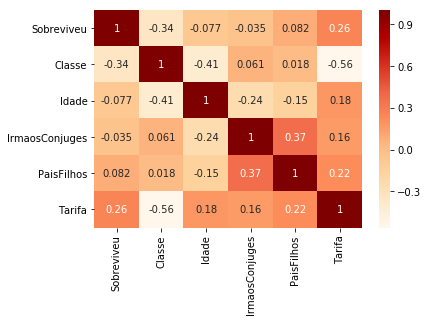

In [37]:
sns.heatmap(data.corr(), annot=True, cmap='OrRd')

### Remover coluna "Sobreviveu"
Aparentemente não tem muita correlação com Idade, e está faltando bastante dados

In [ ]:
data.drop('Sobreviveu', axis=1, inplace=True)

### Checar dados nulos

# Engenharia de Recursos I

### Criar coluna "Titulo" baseando-se na coluna "Nome"

### Traduzir "Titulos"

### Averiguar informações do DataFrame

### Remover "Bilhete" e "Nome"

# Engenharia de Recursos II

### Estudar possibilidade de identificar "meninas" similar aos "meninos"
Através da combinação: "solteira" e está com "pais"

### idade média de "meninas solteiras acompanhadas dos pais"

### verificar distribuição da idade

### Média de mulheres "solteiras"

### Distribuição das idades de mulheres "solteiras"

### Média de idade de mulheres "casadas"

### Distribuição das idades de mulheres "casadas"

### Adicionar coluna "solteira com pais"

### Transformar recursos categóricos em "dummies"

### Separar train e test para idades
* treinar com dados não nulos
* aplicar modelo em dados nulos

## Definir X e y para treinar o modelo

### Importar modelo regressivo

### Instanciar modelo

### Importar train_test_split para preparar para treino

### Dividir 70% para treinar, 30% para testar

### Treinar modelo

### Fazer predição

### Importar mean_squared_error (erro quadrado médio)

### Averiguar score

### Averiguar rmse

### Visualizar resíduos em scatterplot

<a name="tarifa"></a>

### Aplicar modelo nos dados nulos

### Criar coluna Idade contendos as predições

### Averiguar shapes

### Concatenar dados

### Criar DataFrame contendo "IdPassageiro" e "Idade"

### Salvar CSV com idade completa